**Step 1: Set Up the Environment and Dataset**

In [1]:
import tensorflow as tf

# Load the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Step 2: Model 1 - Single-Layer ANN**

In [2]:
from tensorflow.keras import models, layers

# Build the single-layer ANN model
single_layer_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(10, activation='softmax')
])

single_layer_model.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

# Train the model
single_layer_history = single_layer_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7422 - loss: 0.7687 - val_accuracy: 0.8262 - val_loss: 0.5040
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8387 - loss: 0.4688 - val_accuracy: 0.8305 - val_loss: 0.4839
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8486 - loss: 0.4374 - val_accuracy: 0.8395 - val_loss: 0.4595
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8553 - loss: 0.4216 - val_accuracy: 0.8395 - val_loss: 0.4587
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8555 - loss: 0.4159 - val_accuracy: 0.8388 - val_loss: 0.4556
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8613 - loss: 0.4027 - val_accuracy: 0.8368 - val_loss: 0.4669
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8578 - loss: 0.4048 - val_accuracy: 0.8426 - val_loss: 0.4454
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8673 - loss: 0.3844 - 

**Step 3: Model 2 - Double-Layer ANN**

In [3]:
# Build the double-layer ANN model
double_layer_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

double_layer_model.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

# Train the model
double_layer_history = double_layer_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7829 - loss: 0.6314 - val_accuracy: 0.8372 - val_loss: 0.4659
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8616 - loss: 0.3795 - val_accuracy: 0.8565 - val_loss: 0.3876
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8764 - loss: 0.3409 - val_accuracy: 0.8711 - val_loss: 0.3642
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8838 - loss: 0.3143 - val_accuracy: 0.8697 - val_loss: 0.3677
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8918 - loss: 0.2941 - val_accuracy: 0.8768 - val_loss: 0.3454
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8940 - loss: 0.2820 - val_accuracy: 0.8725 - val_loss: 0.3568
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8983 - loss: 0.2701 - val_accuracy: 0.8761 - val_loss: 0.3406
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9061 - loss: 0.2527

**Step 4: Model 3 - Traditional ML Model**

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Flatten images for compatibility with SVM
train_images_flat = train_images.reshape(-1, 28 * 28)
test_images_flat = test_images.reshape(-1, 28 * 28)

# Initialize and train the SVM
svm_model = SVC()
svm_model.fit(train_images_flat, train_labels)

# Evaluate
svm_predictions = svm_model.predict(test_images_flat)
svm_accuracy = accuracy_score(test_labels, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")

SVM Accuracy: 0.8828


**Step 5: Compare Results**

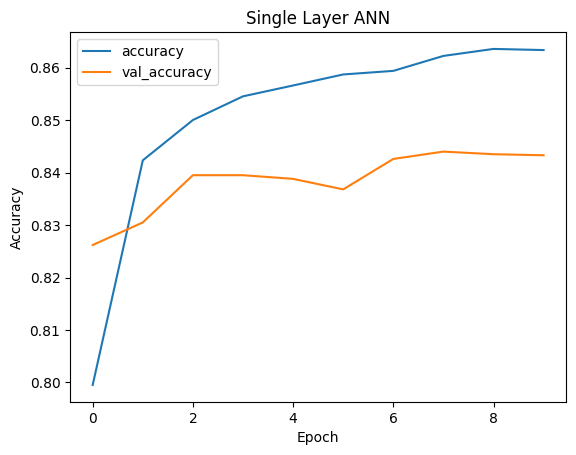

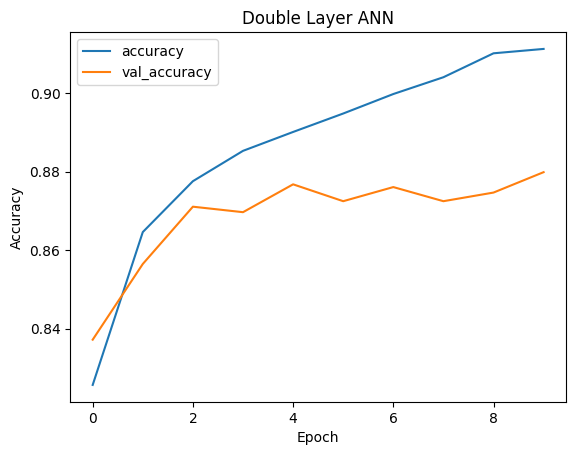

In [5]:
import matplotlib.pyplot as plt

# Plot accuracy and loss for single and double layer ANNs
def plot_learning_curves(history, title):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

plot_learning_curves(single_layer_history, 'Single Layer ANN')
plot_learning_curves(double_layer_history, 'Double Layer ANN')

**Step 6: Answer Analysis Questions**

**Model 1: Single-Layer ANN**
* Training Accuracy: ~86.5% after 10 epochs.
* Validation Accuracy: Stabilized around 84.3%.
* Loss: The validation loss initially decreases but eventually fluctuates, indicating potential overfitting or a limitation in learning capacity for the single-layer structure.

**Observation:**
he single-layer ANN achieves reasonable accuracy, but the relatively flat learning curve suggests that it may struggle to capture complex patterns within the dataset, leading to limited generalization on unseen data.


--------------------------------------------------------------------------------

**Model 2: Double-Layer ANN**
* Training Accuracy: ~91.2% after 10 epochs.
* Validation Accuracy: Around 87.9% at the end.
* Loss: The model's validation loss initially decreases but shows some fluctuation, although it's generally more stable compared to the single-layer ANN.

**Observation:**
The double-layer ANN performs better than the single-layer ANN, with improved accuracy and stability. The additional layer enables the model to learn more complex features, resulting in better performance on both the training and validation sets.

--------------------------------------------------------------------------------

**Model 3: Traditional ML Model (SVM)**
* Validation Accuracy: 88.3% on the test set.

**Observation:**
The SVM model performs comparably to the double-layer ANN in terms of accuracy, achieving an 88.3% score. This suggests that, despite being a non-neural approach, SVM can capture the feature patterns in the dataset effectively due to its robust handling of high-dimensional spaces.

-----------------------------------------------------------------------------

**Summary of Comparative Analysis:**
**Accuracy:**

* Double-Layer ANN: Highest training accuracy (91.2%) and good validation accuracy (87.9%).
* SVM: Slightly higher validation accuracy than the ANN models (88.3%), indicating good generalization.
* Single-Layer ANN: Lowest accuracy (84.3% validation), likely due to its limited capacity.

**Training Time:**

* Double-Layer ANN took slightly longer per epoch than the single-layer model, which is expected due to the extra computations from the additional layer.
* SVM training time depends on the dataset size and is generally slower for larger datasets but performs efficiently here.

**Overfitting and Generalization:**

* Single-Layer ANN shows signs of underfitting, as seen in its plateaued learning curve.
* Double-Layer ANN has a more balanced training and validation accuracy, indicating it generalizes well with some overfitting in later epochs.
* SVM shows strong generalization, given its high validation accuracy without further tuning.

--------------------------------------------------------------------------------